In [24]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
from pyproj import CRS

In [3]:
pks_fp = 'L3_data/PKS_suuralue.kml'
addresses_fp = 'L3_data/addresses.shp'

In [4]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [6]:
df1 = gpd.read_file(pks_fp, driver='KML')
df2 = gpd.read_file(addresses_fp)

In [7]:
df1.head() # districts

,Name,Description,geometry
0,Suur-Espoonlahti,,"POLYGON Z ((24.77506 60.10906 0.00000, 24.7766..."
1,Suur-Kauklahti,,"POLYGON Z ((24.61578 60.17257 0.00000, 24.6155..."
2,Vanha-Espoo,,"POLYGON Z ((24.67576 60.21201 0.00000, 24.6752..."
3,Pohjois-Espoo,,"POLYGON Z ((24.76792 60.26920 0.00000, 24.7699..."
4,Suur-Matinkylä,,"POLYGON Z ((24.75361 60.16631 0.00000, 24.7537..."


In [8]:
df2.head() # addresses

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93169 60.16902)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94168 60.16996)
3,"1, Hermannin rantatie, Hermanninmäki, Hermanni...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.96554 60.20089)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92160 60.15665)


In [9]:
df1.crs

{'init': 'epsg:4326'}

In [10]:
df2.crs

{}

<AxesSubplot:>

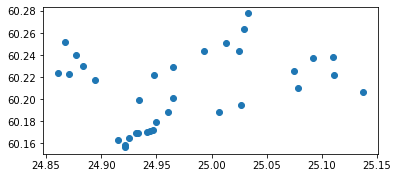

In [11]:
df2.plot()

In [14]:
df2.crs = CRS.from_epsg(4326)

In [16]:
df2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
df1 = df1.to_crs(epsg=3067)
df2 = df2.to_crs(epsg=3067)

/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/cristian/opt/anaconda3/envs/geo/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [18]:
df1.head()

,Name,Description,geometry
0,Suur-Espoonlahti,,"POLYGON Z ((376322.317 6665639.417 0.000, 3764..."
1,Suur-Kauklahti,,"POLYGON Z ((367726.077 6673018.023 0.000, 3677..."
2,Vanha-Espoo,,"POLYGON Z ((371207.712 6677289.881 0.000, 3711..."
3,Pohjois-Espoo,,"POLYGON Z ((376528.523 6683480.345 0.000, 3766..."
4,Suur-Matinkylä,,"POLYGON Z ((375347.271 6672052.630 0.000, 3753..."


In [19]:
df2.head()

,address,id,addr,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (384320.898 6671412.395)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (385236.107 6672032.292)
2,"Bangkok9, 8, Kaivokatu, Keskusta, Kluuvi, Etel...",1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (385793.762 6672119.786)
3,"1, Hermannin rantatie, Hermanninmäki, Hermanni...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (387222.953 6675521.721)
4,"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (384632.937 6670672.154)


In [20]:
df1['centroid'] = df1.centroid
df1.head()

,Name,Description,geometry,centroid
0,Suur-Espoonlahti,,"POLYGON Z ((376322.317 6665639.417 0.000, 3764...",POINT (375676.529 6658405.261)
1,Suur-Kauklahti,,"POLYGON Z ((367726.077 6673018.023 0.000, 3677...",POINT (365520.906 6675893.101)
2,Vanha-Espoo,,"POLYGON Z ((371207.712 6677289.881 0.000, 3711...",POINT (367400.175 6681941.088)
3,Pohjois-Espoo,,"POLYGON Z ((376528.523 6683480.345 0.000, 3766...",POINT (372191.037 6687785.458)
4,Suur-Matinkylä,,"POLYGON Z ((375347.271 6672052.630 0.000, 3753...",POINT (375678.189 6670243.076)


In [21]:
def get_nearest_values(row, other_gdf, point_column='geometry', value_column='geometry'):
    """Finds the nearest point and return the corresponding value from the specified value column"""
    
    # Create an union (multi-geometry) of the other GeodataFrame's geometries
    other_points = other_gdf['geometry'].unary_union
    
    # Find the nearest points
    nearest_geoms = nearest_points(row[point_column], other_points)
    
    # Get the corresponding values form the other df
    nearest_data = other_gdf.loc[other_gdf['geometry'] == nearest_geoms[1]]
    
    nearest_value = nearest_data[value_column].values[0]
    
    return nearest_value

In [22]:
unary_union = df2.unary_union
print(unary_union)

MULTIPOINT (381514.7490176007 6678278.639152779, 381933.0537320158 6681356.239504716, 382062.9450822329 6678092.844435816, 382455.3108161838 6680002.184086512, 382801.4032546207 6678969.588350637, 383326.4146784388 6677463.572679194, 384320.8982796484 6671412.394772961, 384618.5735139819 6670910.761284161, 384632.9367817009 6670672.153797518, 384864.7684069074 6671583.024328775, 385236.1071374319 6672032.291530753, 385315.3532032121 6672037.488103471, 385466.3611433207 6675430.456732685, 385793.7621273005 6672119.786274237, 385932.054321637 6672264.536967332, 386113.4590202611 6672322.486654068, 386261.9156116062 6673160.598640078, 386323.7502928812 6677878.715123225, 386914.0731579416 6674119.122686372, 387222.9530337183 6675521.721052252, 387320.8120850853 6678704.464068138, 388924.301839899 6680234.979897246, 389469.4416996006 6674096.854469957, 390024.582701657 6681059.205512979, 390587.7091029222 6674705.202218597, 390639.7156942248 6680193.899145388, 390955.427228181 6682400.2355

In [25]:
df1['nearest_loc'] = df1.apply(get_nearest_values, other_gdf=df2, point_column='centroid', value_column='geometry', axis=1)

In [26]:
df1.head()

,Name,Description,geometry,centroid,nearest_loc
0,Suur-Espoonlahti,,"POLYGON Z ((376322.317 6665639.417 0.000, 3764...",POINT (375676.529 6658405.261),POINT (384632.9367817009 6670672.153797518)
1,Suur-Kauklahti,,"POLYGON Z ((367726.077 6673018.023 0.000, 3677...",POINT (365520.906 6675893.101),POINT (381514.7490176007 6678278.639152779)
2,Vanha-Espoo,,"POLYGON Z ((371207.712 6677289.881 0.000, 3711...",POINT (367400.175 6681941.088),POINT (381933.0537320158 6681356.239504716)
3,Pohjois-Espoo,,"POLYGON Z ((376528.523 6683480.345 0.000, 3766...",POINT (372191.037 6687785.458),POINT (381933.0537320158 6681356.239504716)
4,Suur-Matinkylä,,"POLYGON Z ((375347.271 6672052.630 0.000, 3753...",POINT (375678.189 6670243.076),POINT (384320.8982796484 6671412.394772961)


In [27]:
df1['nearest_loc_id'] = df1.apply(get_nearest_values, other_gdf=df2, point_column='centroid', value_column='id', axis=1)

In [28]:
df1.head()

,Name,Description,geometry,centroid,nearest_loc,nearest_loc_id
0,Suur-Espoonlahti,,"POLYGON Z ((376322.317 6665639.417 0.000, 3764...",POINT (375676.529 6658405.261),POINT (384632.9367817009 6670672.153797518),1005
1,Suur-Kauklahti,,"POLYGON Z ((367726.077 6673018.023 0.000, 3677...",POINT (365520.906 6675893.101),POINT (381514.7490176007 6678278.639152779),1020
2,Vanha-Espoo,,"POLYGON Z ((371207.712 6677289.881 0.000, 3711...",POINT (367400.175 6681941.088),POINT (381933.0537320158 6681356.239504716),1017
3,Pohjois-Espoo,,"POLYGON Z ((376528.523 6683480.345 0.000, 3766...",POINT (372191.037 6687785.458),POINT (381933.0537320158 6681356.239504716),1017
4,Suur-Matinkylä,,"POLYGON Z ((375347.271 6672052.630 0.000, 3753...",POINT (375678.189 6670243.076),POINT (384320.8982796484 6671412.394772961),1000
